In [2]:
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from glob import glob

# %config InlineBackend.figure_format='retina'
matplotlib.rcParams.update({'font.size': 14})

In [3]:
title = '1013_model_search'
result_path = '../../result'

# result_path 안에 있는 로그 파일 찾기
log_paths = glob(result_path + '/**/*.txt', recursive=True)
log_paths = [log_path for log_path in log_paths if not('1011' in log_path)] #1011 제외

log_paths.sort()

# 로그 파일 경로 출력
print("log paths: ")
print('\n'.join(log_paths))

log paths: 
../../result/hustvl/yolos-tiny/yolos-tiny.txt
../../result/jozhang97/deta-swin-large_0/deta-swin-large_0.txt
../../result/jozhang97/deta-swin-large_1/deta-swin-large_1.txt
../../result/jozhang97/deta-swin-large_2/deta-swin-large_2.txt
../../result/jozhang97/deta-swin-large_3/deta-swin-large_3.txt
../../result/jozhang97/deta-swin-large_4/deta-swin-large_4.txt


In [5]:
def get_logs(path):
    best_score_standard = 'eval_map_50'
    name = os.path.splitext(os.path.basename(path))[0]

    with open(path, 'r') as f:
        logs = f.read()

    logs = logs.replace("\n", "")
    logs = logs.split('}')
    logs = [json.loads(log + '}') for log in logs if len(log)]

    last_log = logs[-1]
    logs = logs[0:-1]

    df_logs1 = pd.DataFrame(logs[0::2])
    df_logs2 = pd.DataFrame(logs[1::2])
    
    df_logs = pd.merge(left=df_logs1, right=df_logs2, how="outer", on=['epoch'])
    train_runtime = last_log['train_runtime'] / 3600 # 초에서 시간으로 변환
    best_score = df_logs[best_score_standard].max()

    result = {'name': name, 'log': df_logs, 'train_time': train_runtime, 'best_score': best_score}
    return result

# 로그 읽어오기
logs = [get_logs(log_path) for log_path in log_paths]
logs.sort(key = lambda x:x['best_score'], reverse=True) # 점수가 높은 순으로 바꾸기

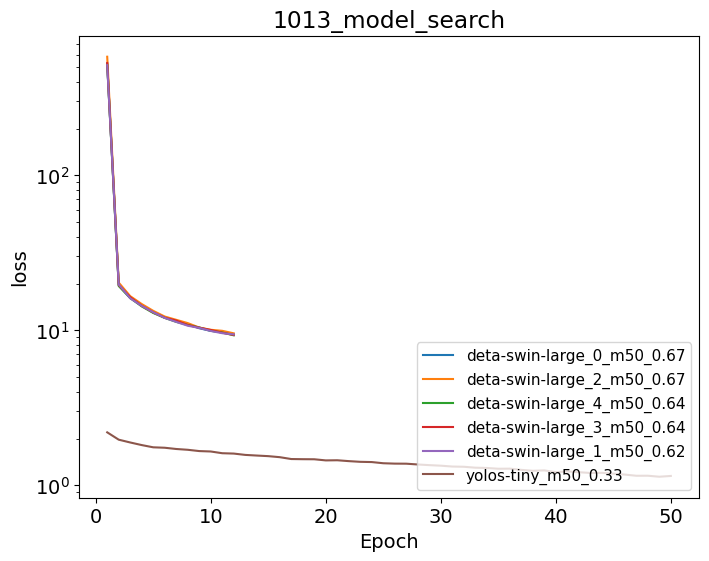

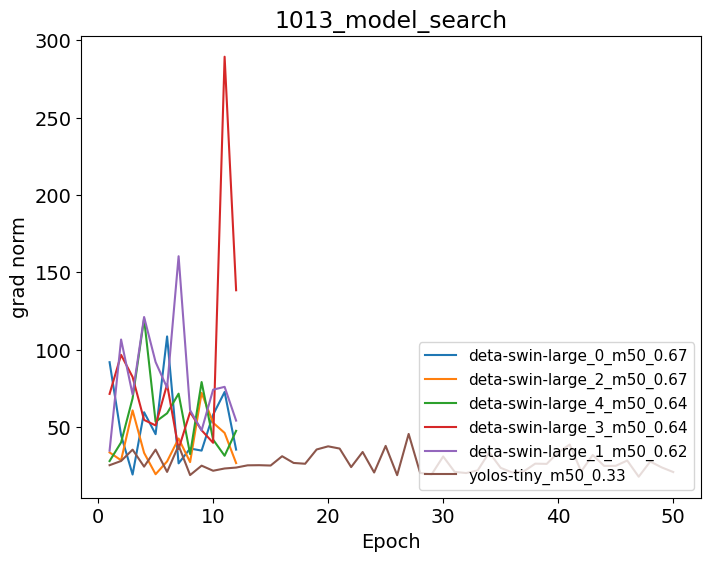

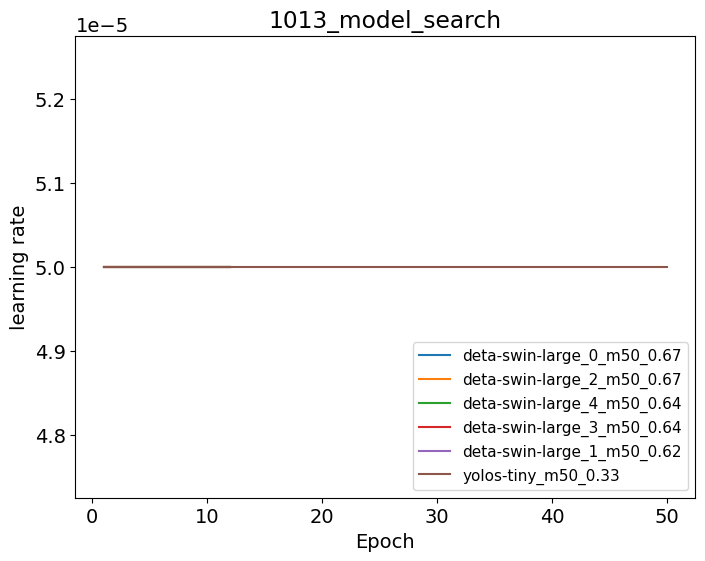

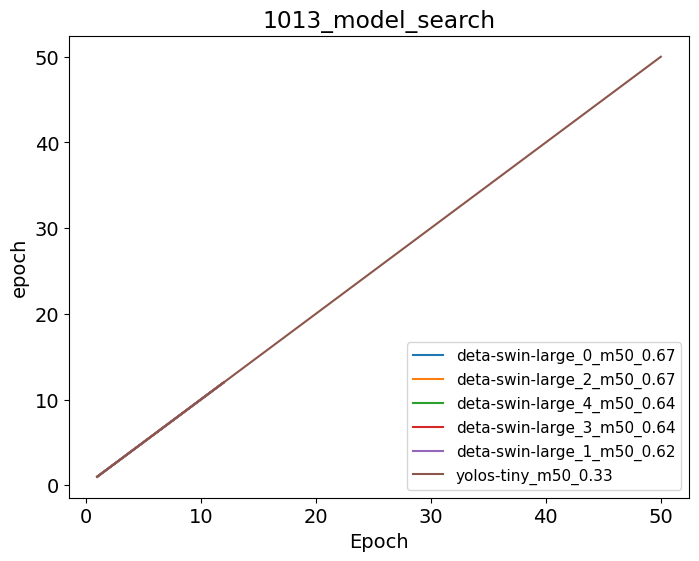

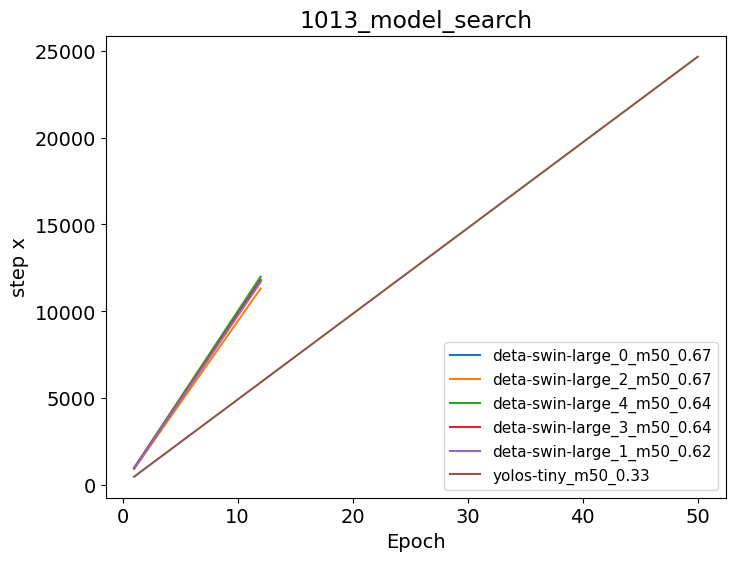

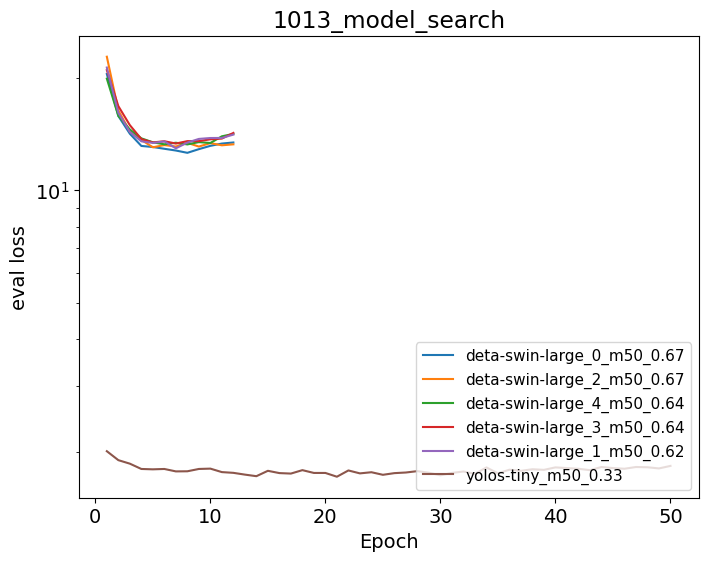

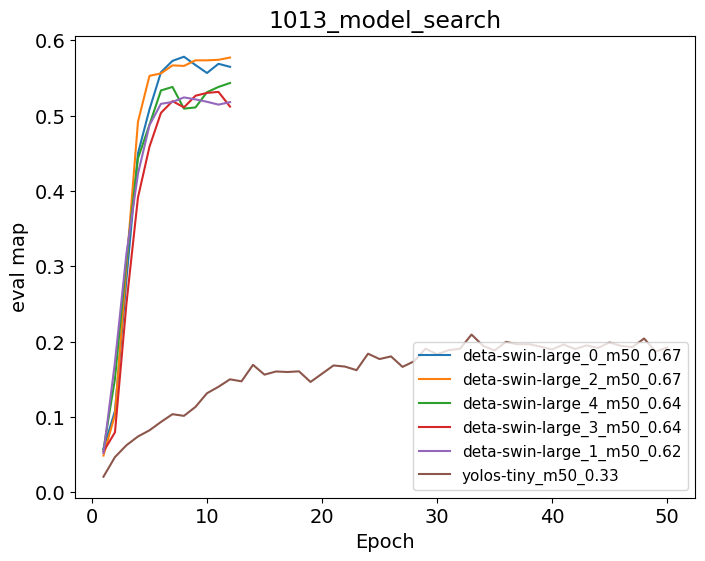

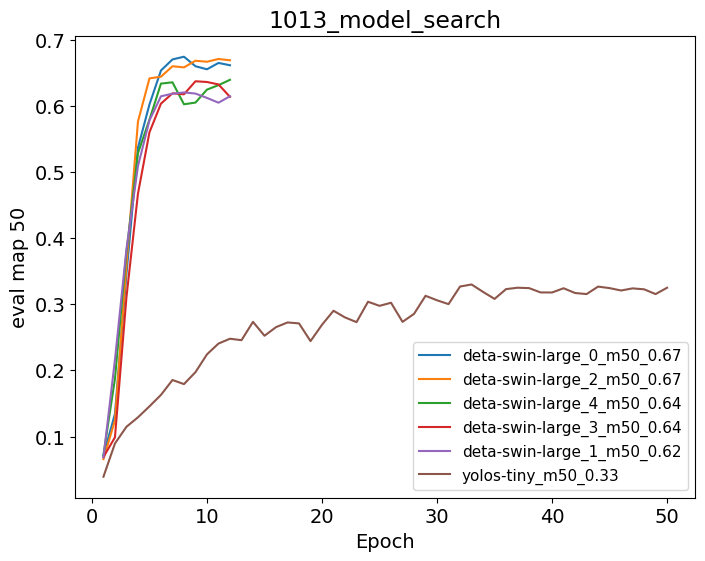

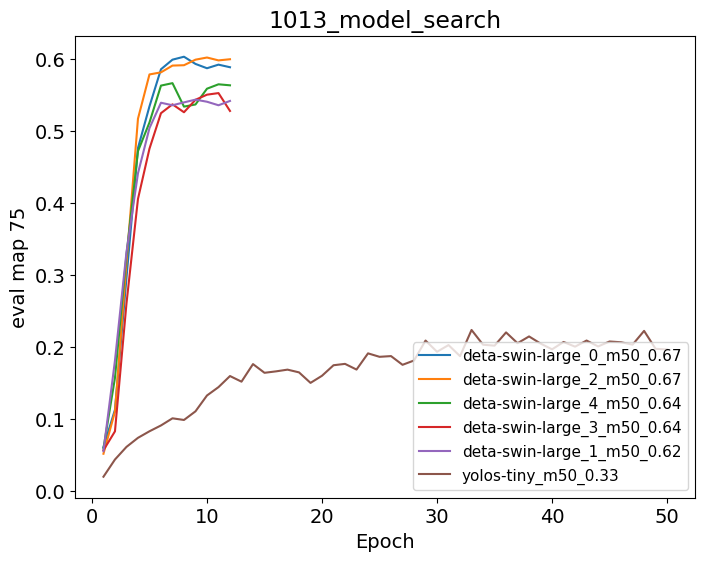

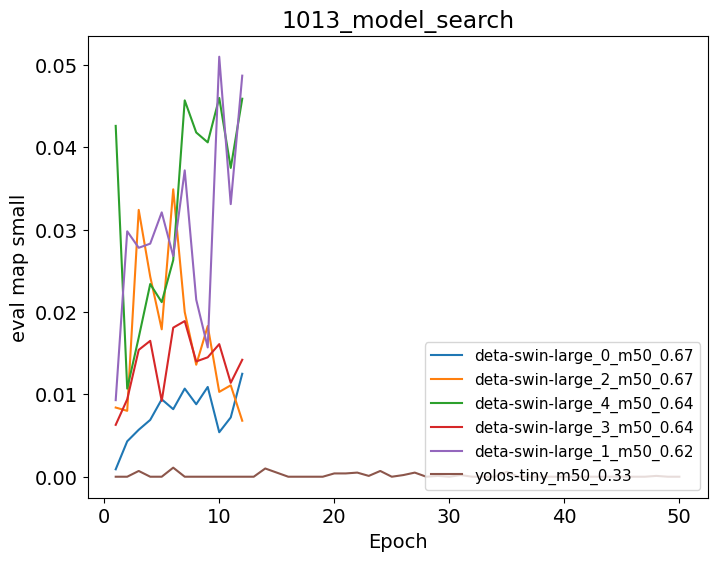

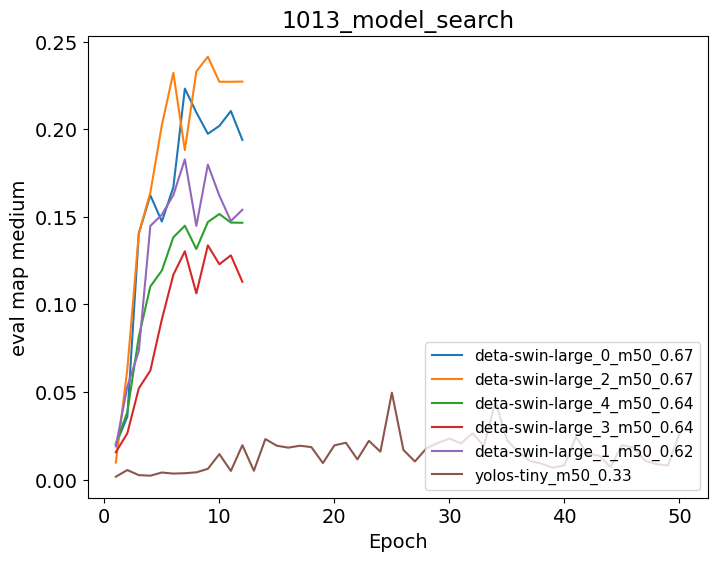

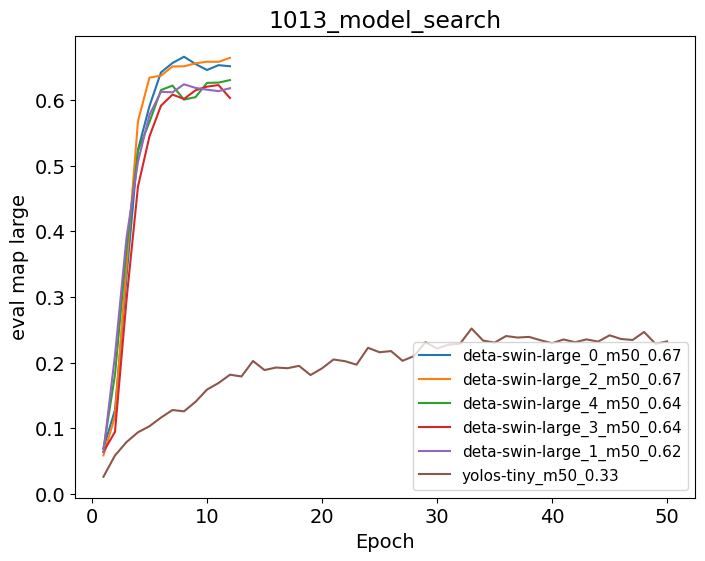

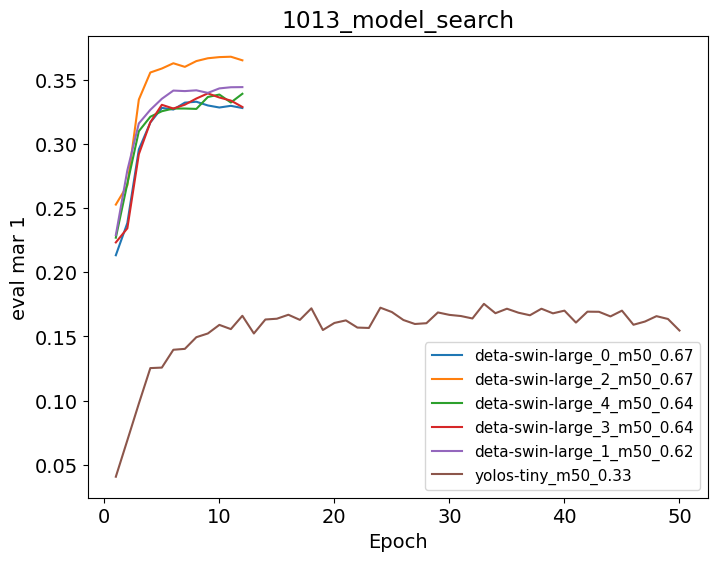

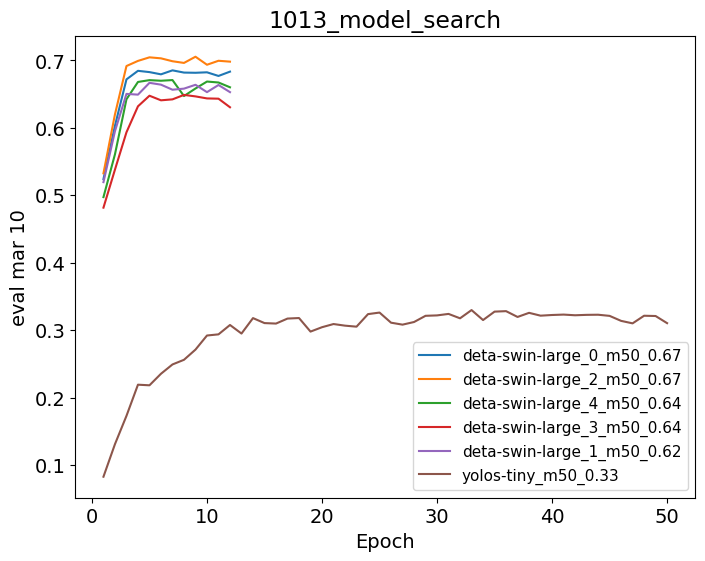

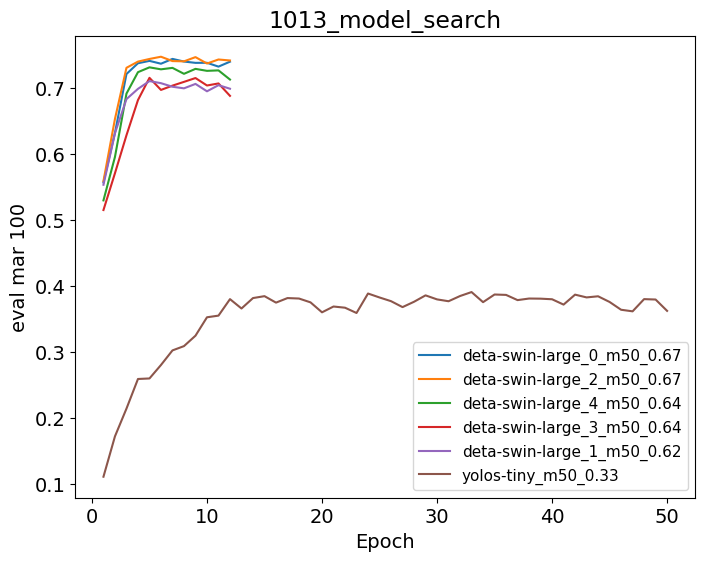

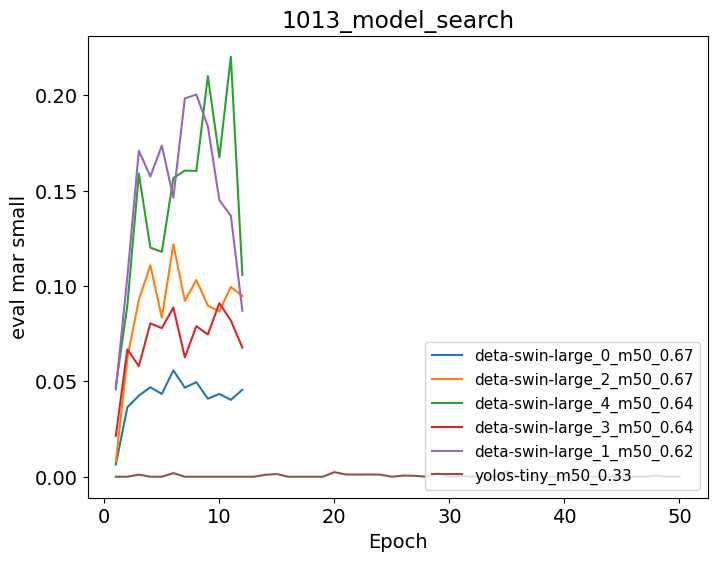

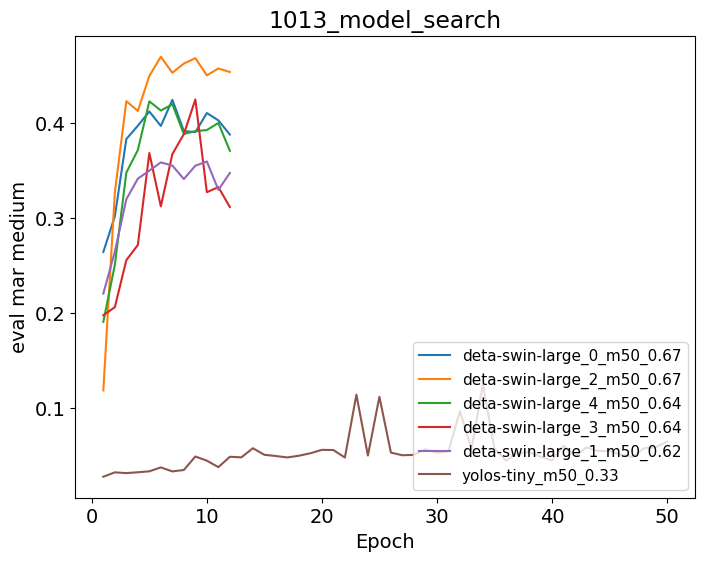

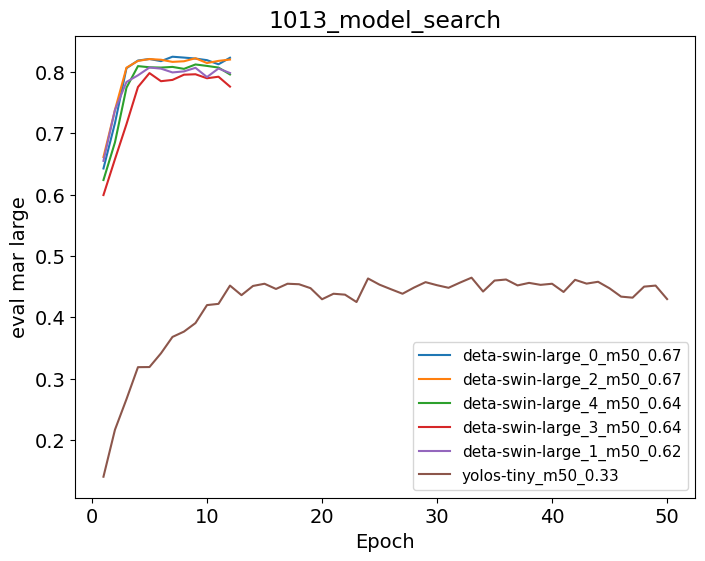

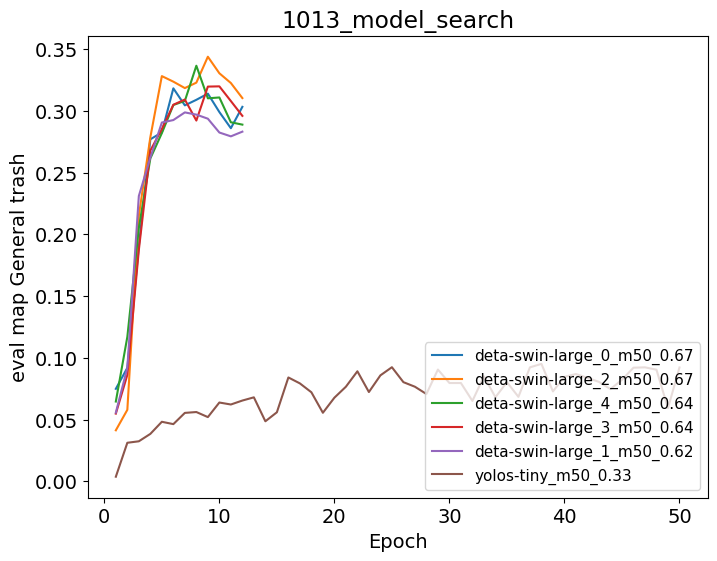

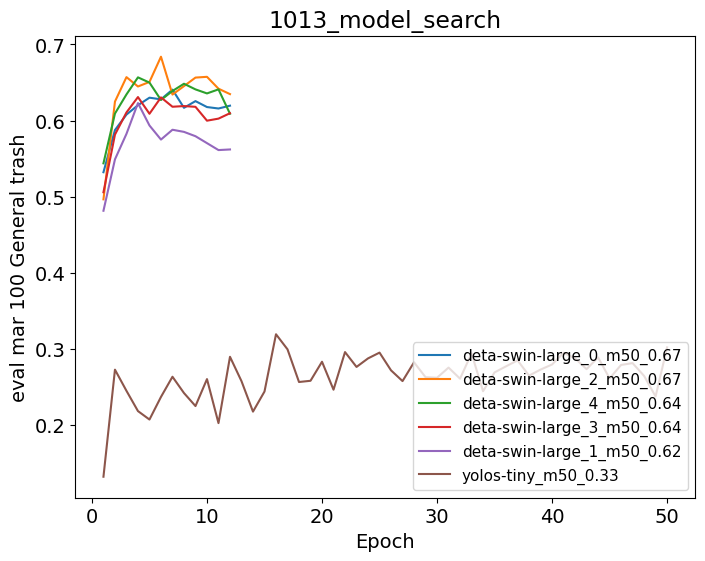

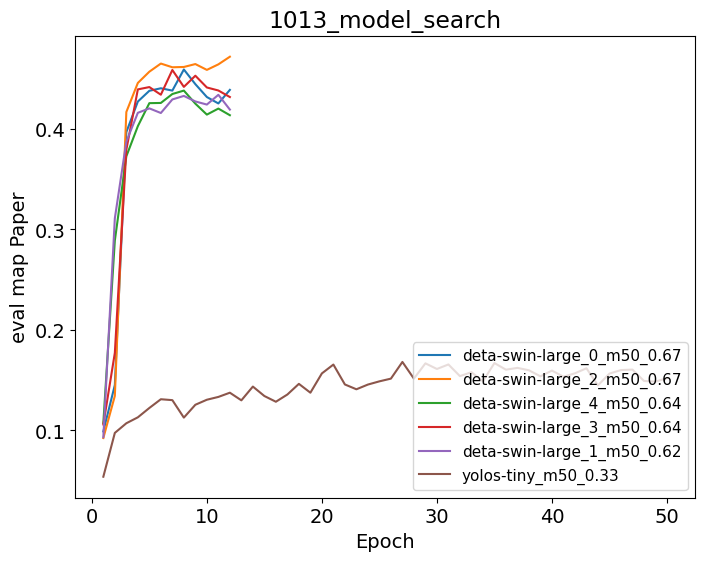

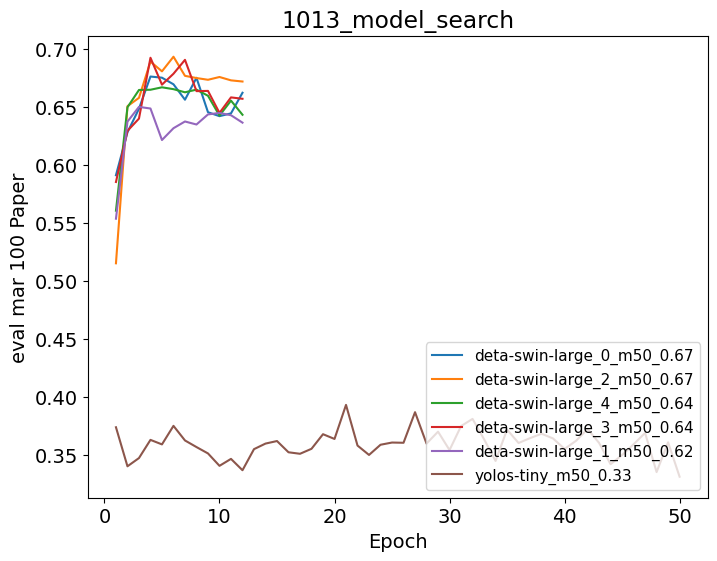

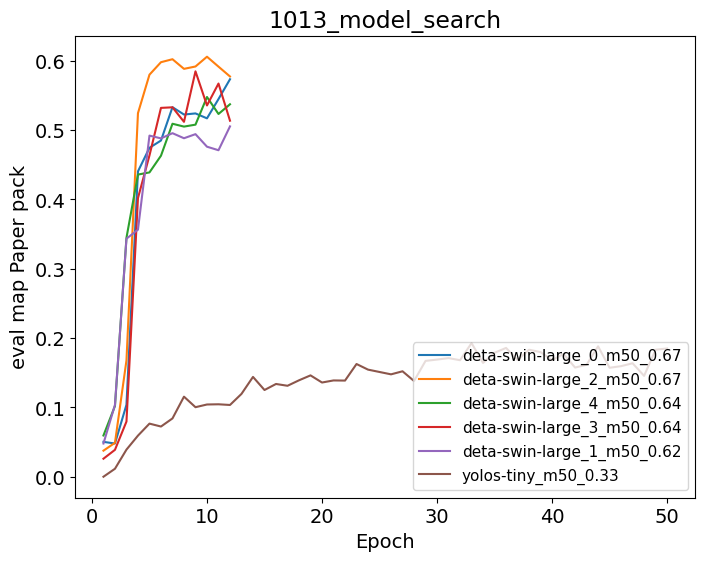

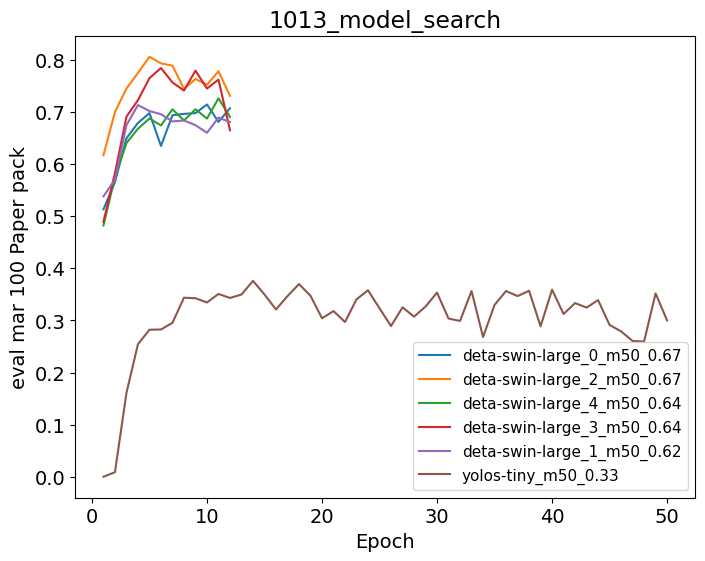

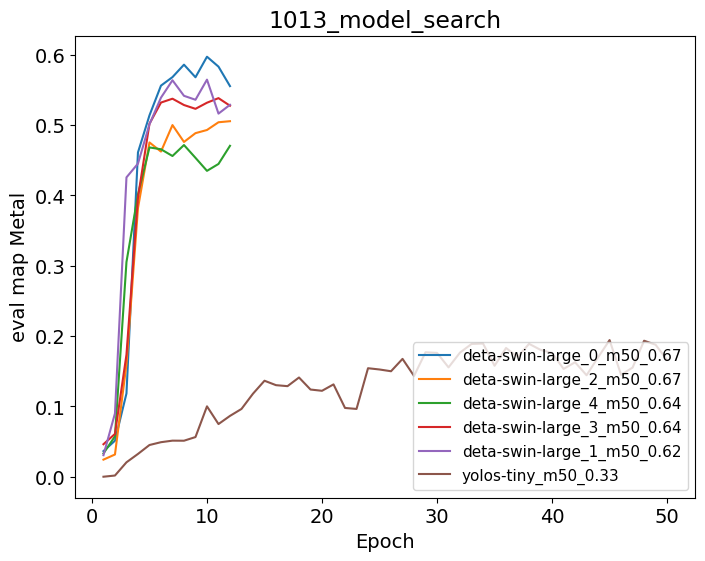

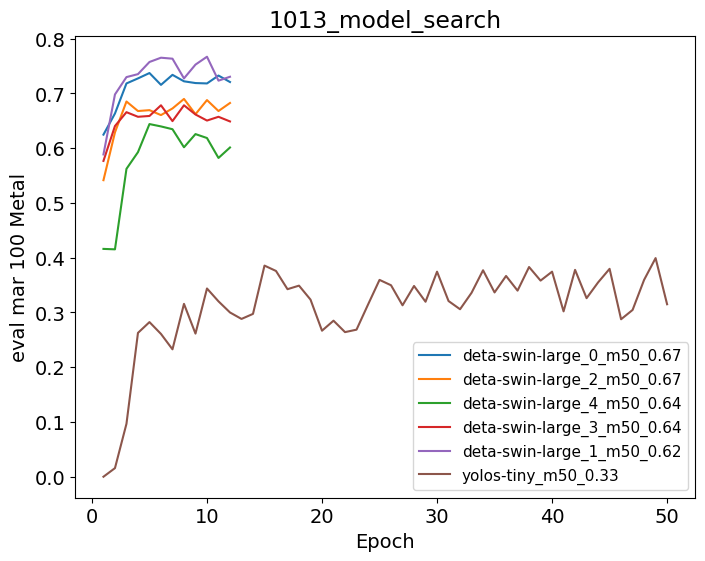

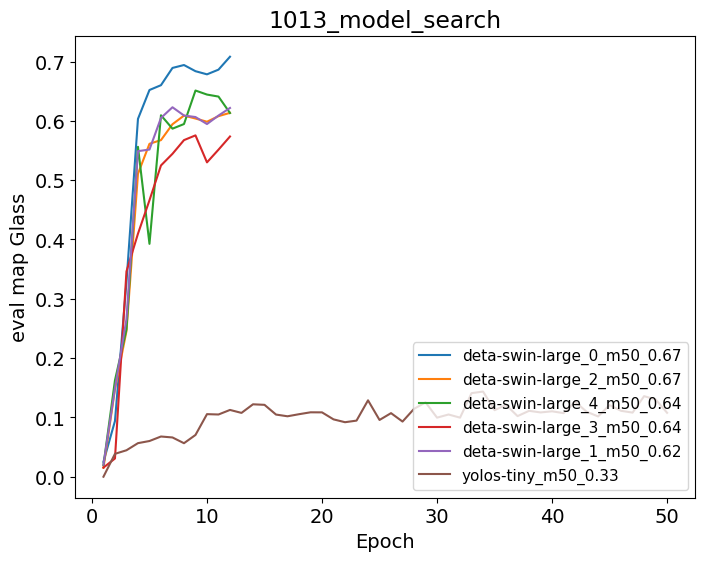

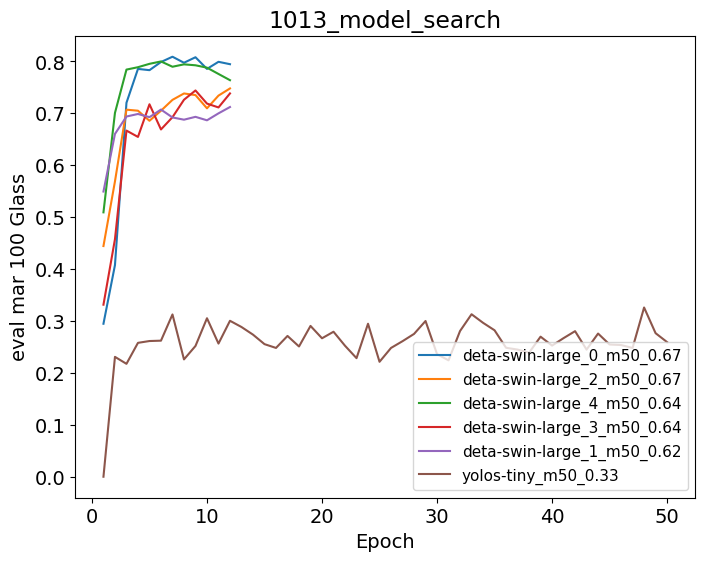

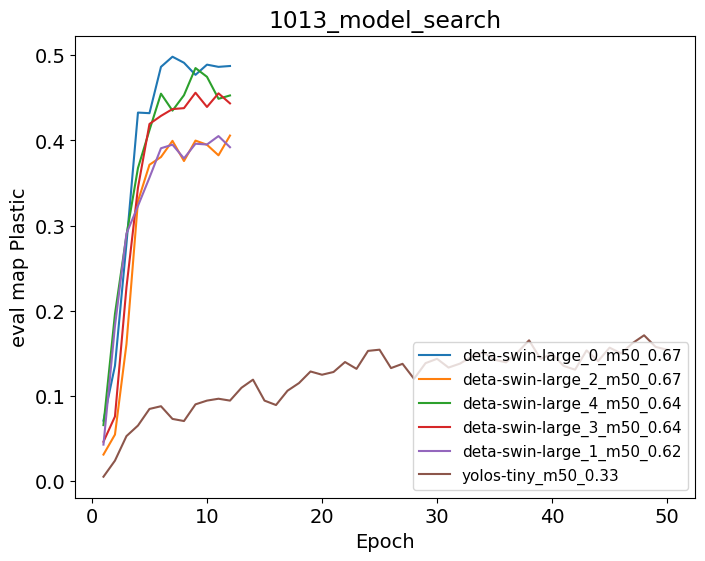

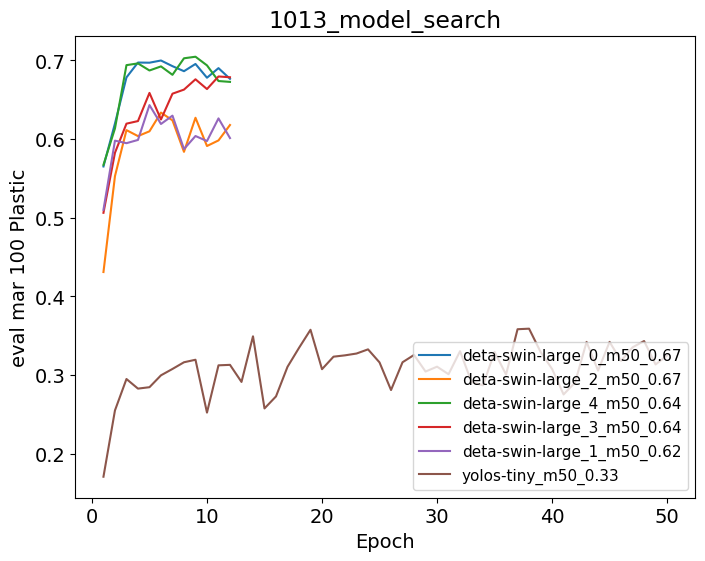

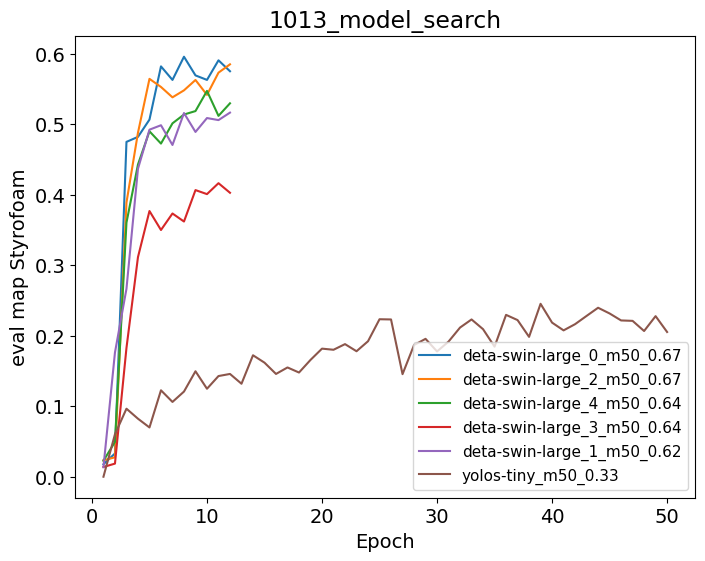

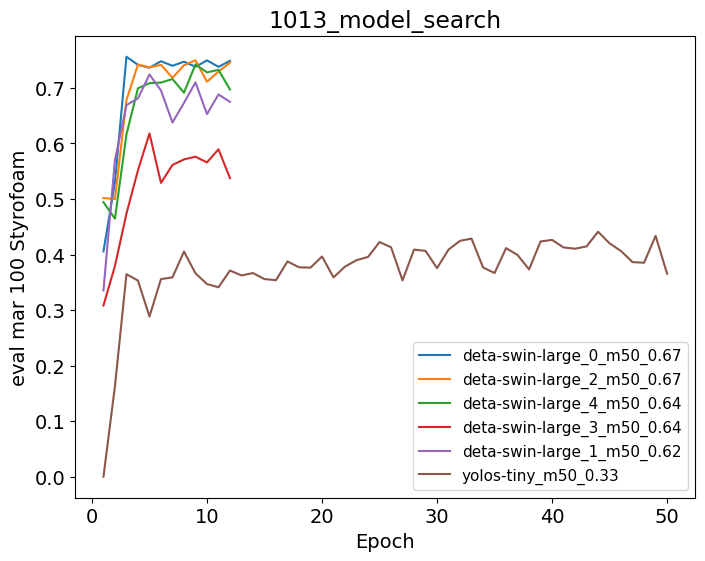

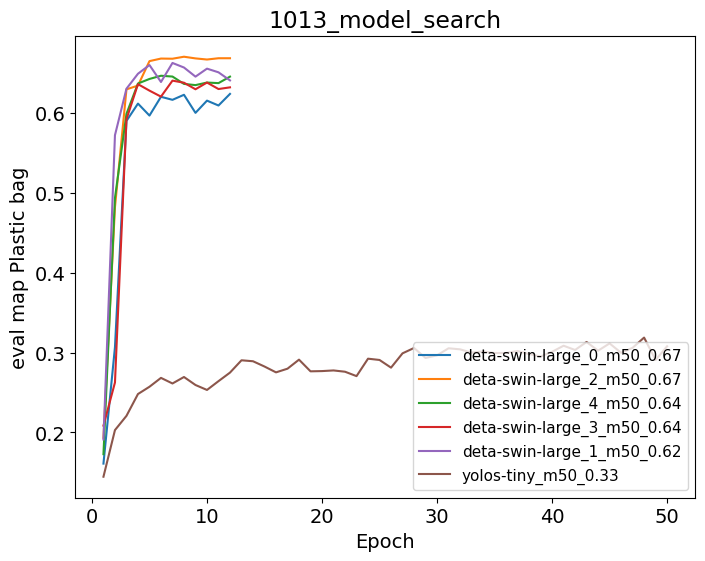

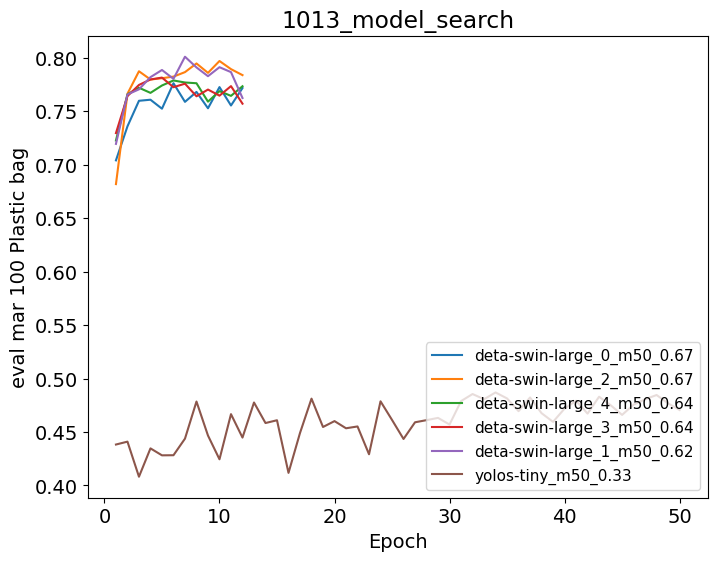

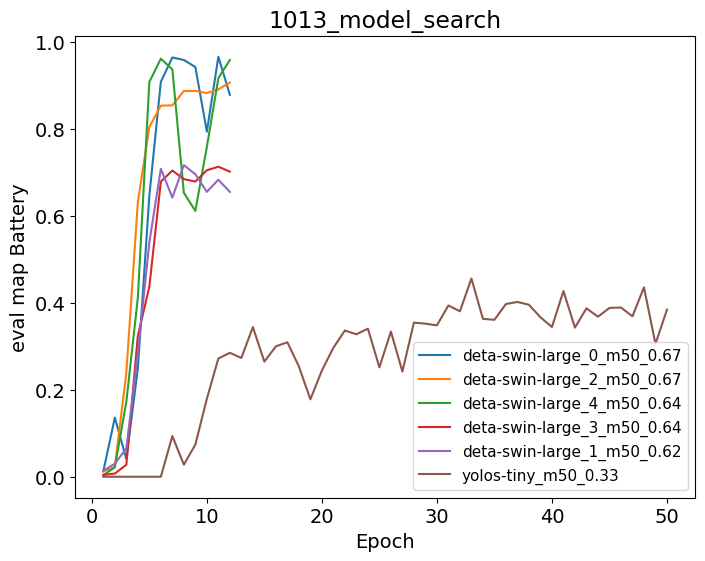

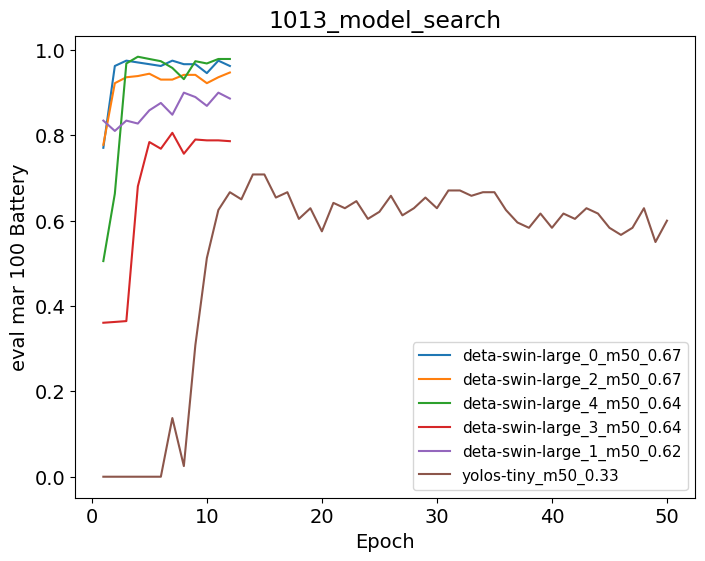

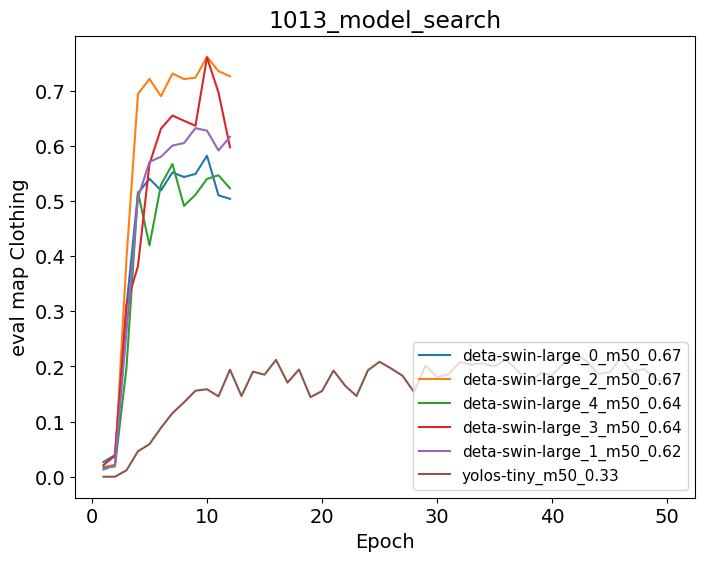

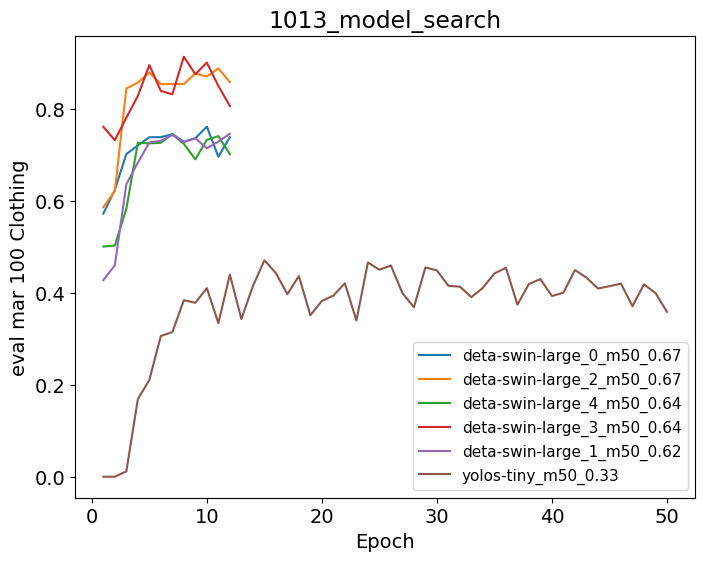

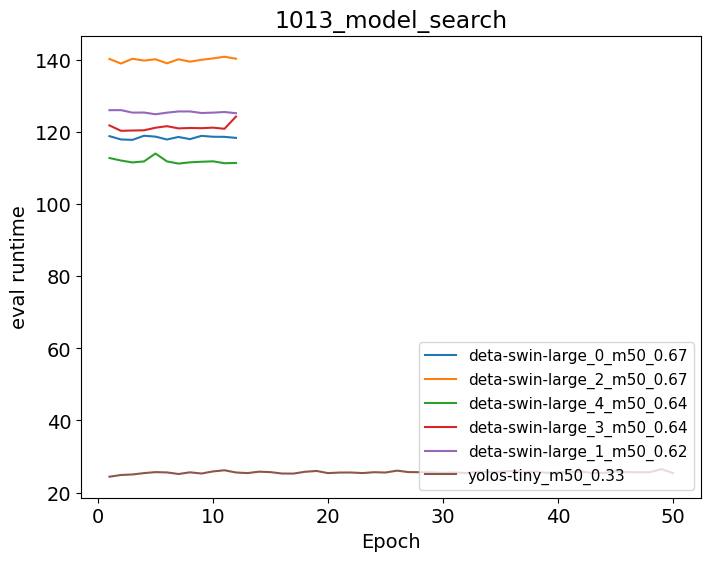

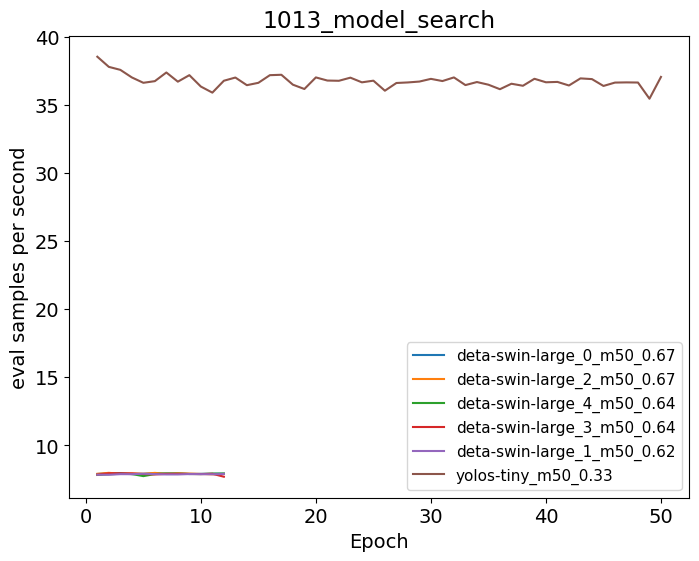

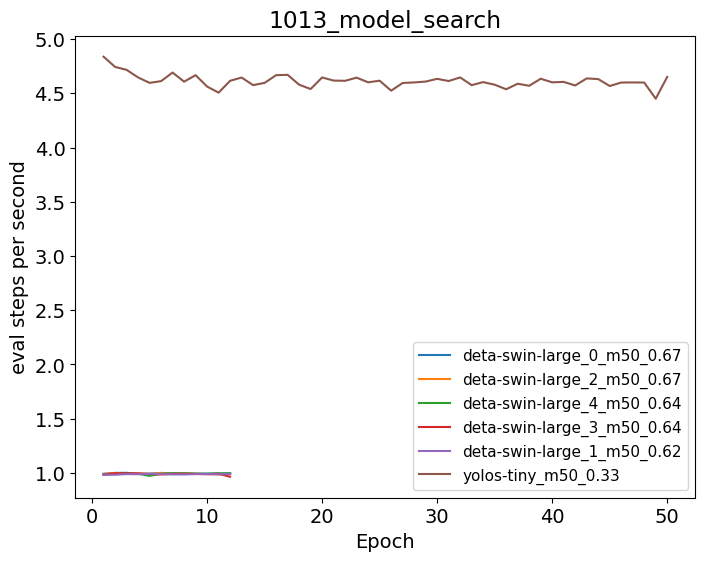

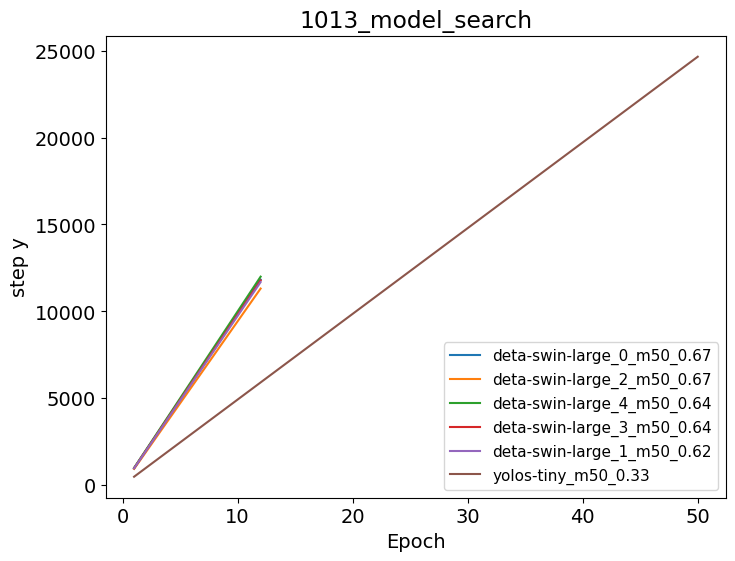

In [12]:
y_names = logs[0]['log'].columns

# 색 정의
colors = [f"C{i}" for i in range(len(logs))]

for y_name in y_names:
    [fig, ax] = plt.subplots(1, 1, figsize = (8, 6))

    for i, log in enumerate(logs):
        name = log['name']
        df = log['log']
        train_time = log['train_time']
        best_score = log['best_score']
        
        epoch = df['epoch']
        color = colors[i]
        time = train_time * epoch / epoch.max()

        ax.plot(epoch, df[y_name], label=name+f'_m50_{best_score:.2f}', color=color)
        ax.set_xlabel("Epoch")
        ax.set_ylabel(y_name.replace("_", " "))
        ax.legend(fontsize = 11, loc="lower right")
        ax.set_title(title)

        if 'loss' in y_name:
            ax.set_yscale('log', base = 10)

    plt.show()



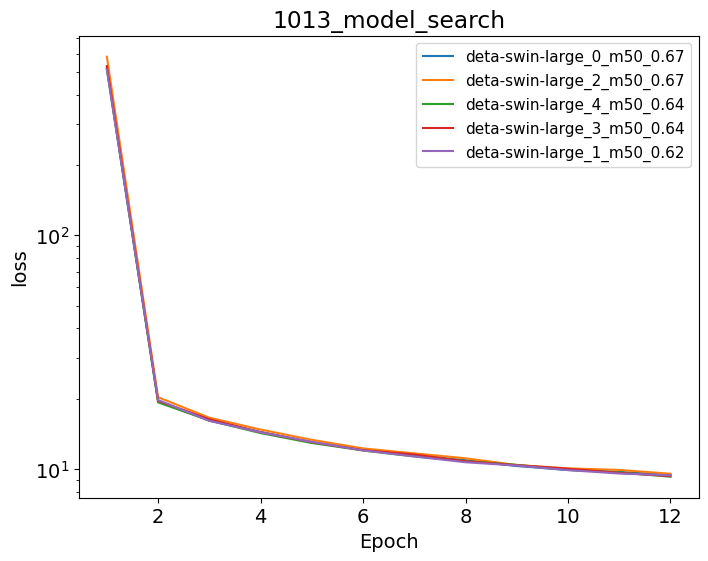

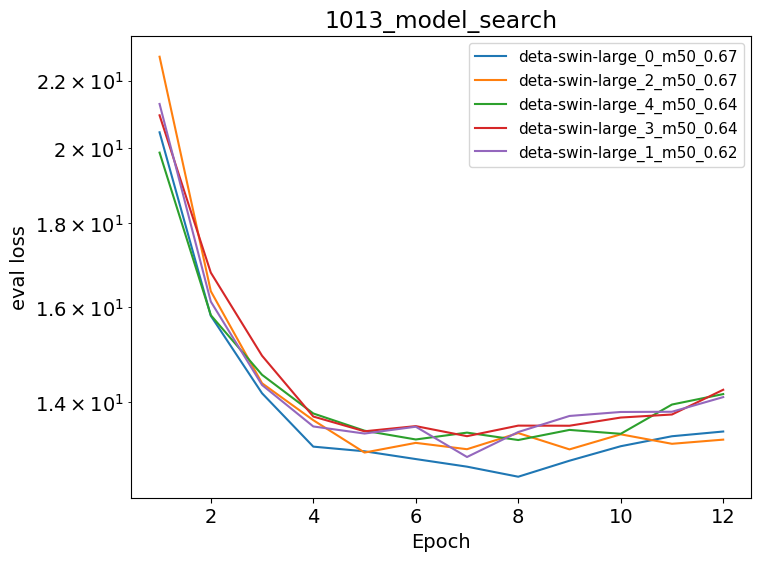

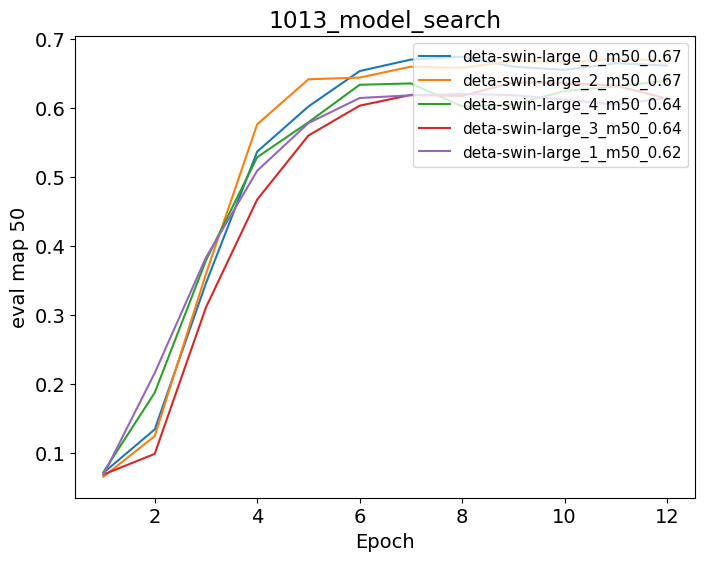

In [22]:
# DETA만 보기
y_names = ['loss', 'eval_loss', 'eval_map_50']

# 색 정의
colors = [f"C{i}" for i in range(len(logs))]

for y_name in y_names:
    [fig, ax] = plt.subplots(1, 1, figsize = (8, 6))

    for i, log in enumerate(logs):
        name = log['name']
        df = log['log']
        train_time = log['train_time']
        best_score = log['best_score']

        if not 'deta' in name:
            continue
        
        epoch = df['epoch']
        color = colors[i]
        time = train_time * epoch / epoch.max()

        ax.plot(epoch, df[y_name], label=name+f'_m50_{best_score:.2f}', color=color)
        ax.set_xlabel("Epoch")
        ax.set_ylabel(y_name.replace("_", " "))
        ax.legend(fontsize = 11, loc="upper right")
        ax.set_title(title)

        if 'loss' in y_name:
            ax.set_yscale('log', base = 10)

    plt.show()



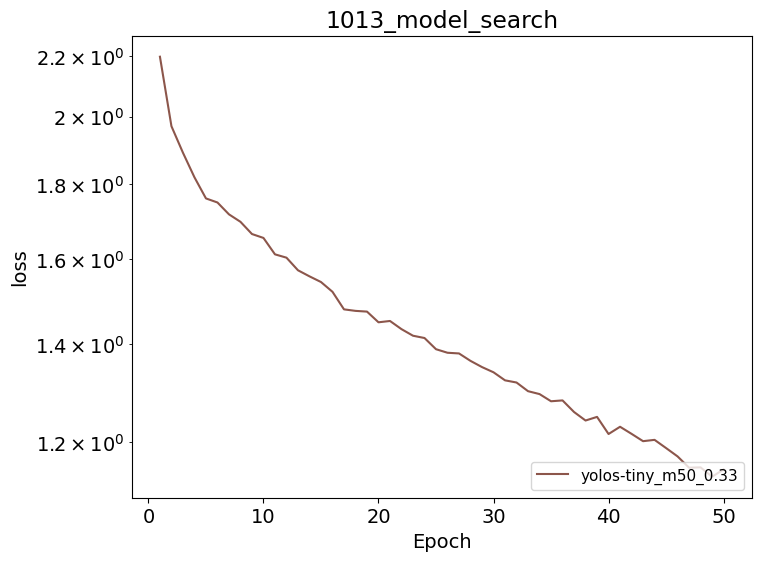

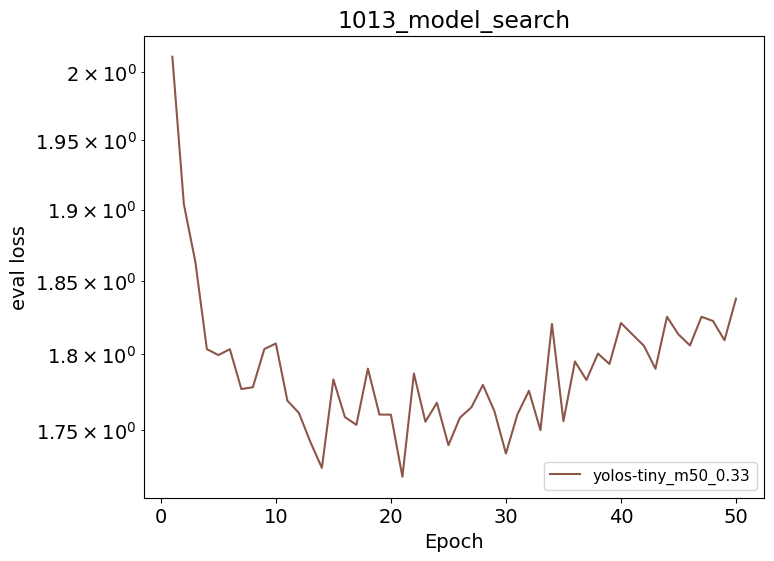

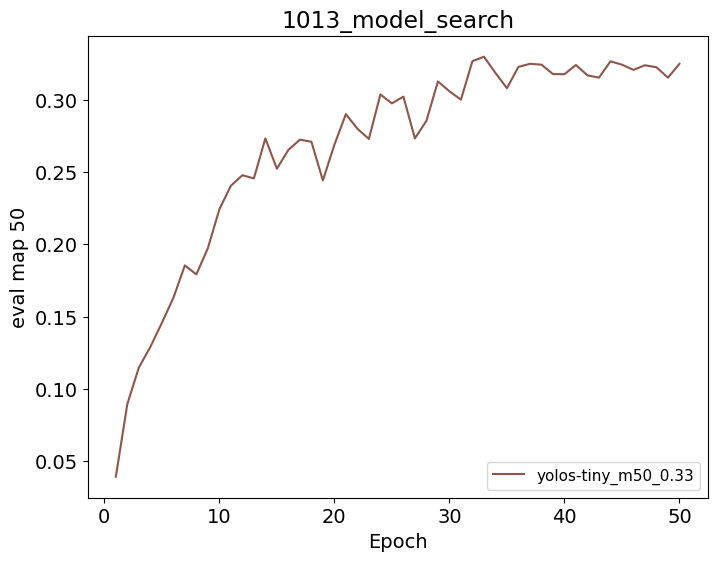

In [8]:
# DETA 제외하고 보기
y_names = ['loss', 'eval_loss', 'eval_map_50']

# 색 정의
colors = [f"C{i}" for i in range(len(logs))]

for y_name in y_names:
    [fig, ax] = plt.subplots(1, 1, figsize = (8, 6))

    for i, log in enumerate(logs):
        name = log['name']
        df = log['log']
        train_time = log['train_time']
        best_score = log['best_score']

        if 'deta' in name:
            continue
        
        epoch = df['epoch']
        color = colors[i]
        time = train_time * epoch / epoch.max()

        ax.plot(epoch, df[y_name], label=name+f'_m50_{best_score:.2f}', color=color)
        ax.set_xlabel("Epoch")
        ax.set_ylabel(y_name.replace("_", " "))
        ax.legend(fontsize = 11, loc="lower right")
        ax.set_title(title)

        if 'loss' in y_name:
            ax.set_yscale('log', base = 10)

    plt.show()


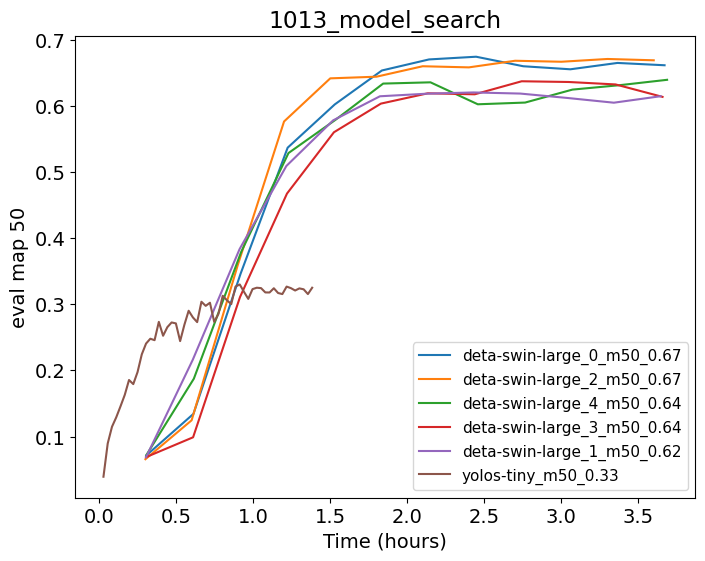

In [13]:
# 시간축으로 그리기
y_names = ['eval_map_50']

# 색 정의
colors = [f"C{i}" for i in range(len(logs))]

for y_name in y_names:
    [fig, ax] = plt.subplots(1, 1, figsize = (8, 6))

    for i, log in enumerate(logs):
        name = log['name']
        df = log['log']
        train_time = log['train_time']
        best_score = log['best_score']
        
        epoch = df['epoch']
        color = colors[i]
        time = train_time * epoch / epoch.max()

        ax.plot(time, df[y_name], label=name+f'_m50_{best_score:.2f}', color=color)
        ax.set_xlabel("Time (hours)")
        ax.set_ylabel(y_name.replace("_", " "))
        ax.legend(fontsize = 11, loc="lower right")
        ax.set_title(title)

        if 'loss' in y_name:
            ax.set_yscale('log', base = 10)

    plt.show()


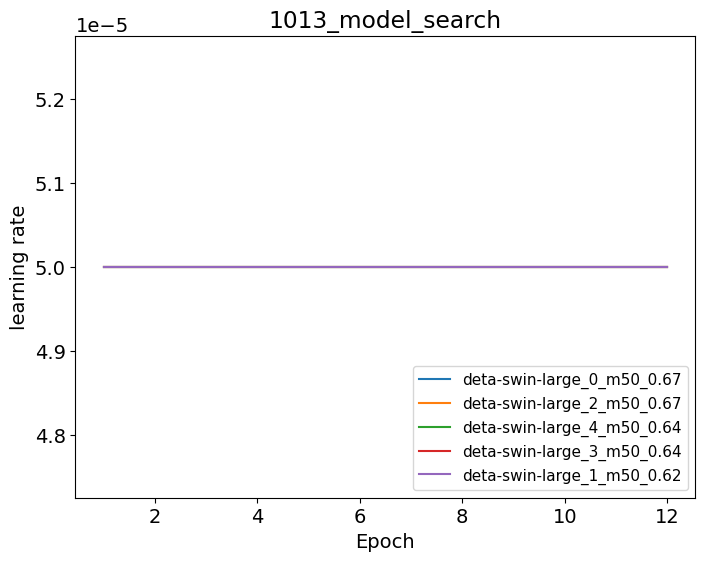

In [14]:
# learning_rate 그리기
y_names = ['learning_rate']

# 색 정의
colors = [f"C{i}" for i in range(len(logs))]

for y_name in y_names:
    [fig, ax] = plt.subplots(1, 1, figsize = (8, 6))

    for i, log in enumerate(logs):
        name = log['name']
        df = log['log']
        train_time = log['train_time']
        best_score = log['best_score']
        
        epoch = df['epoch']
        color = colors[i]
        time = train_time * epoch / epoch.max()

        if not 'deta' in name:
            continue

        ax.plot(epoch, df[y_name], label=name+f'_m50_{best_score:.2f}', color=color)
        ax.set_xlabel("Epoch")
        ax.set_ylabel(y_name.replace("_", " "))
        ax.legend(fontsize = 11, loc="lower right")
        ax.set_title(title)

        if 'loss' in y_name:
            ax.set_yscale('log', base = 10)

    plt.show()


In [27]:
for log in logs:
    print(f"{log['name']}: {log['best_score']:.4f}, min loss: {log['log']['loss'].min()}")

deta-swin-large_0: 0.6741, min loss: 9.4522
deta-swin-large_2: 0.6707, min loss: 9.5581
deta-swin-large_4: 0.6392, min loss: 9.2798
deta-swin-large_3: 0.6370, min loss: 9.3331
deta-swin-large_1: 0.6201, min loss: 9.4123
yolos-tiny: 0.3298, min loss: 1.1365


1.1365